# Test
netflex/src/test.ipynb by Jens Brage (jens.brage@noda.se)

In [22]:
import matplotlib
%matplotlib inline
matplotlib.pyplot.rcParams['figure.figsize'] = [21, 13]
import networkx
import time

In [2]:
import cvxpy
import numpy
import pandas

/Users/jens/anaconda3/envs/cvxpy/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
from netflex import *

The data folder contains price and temperature data for the three years below. Select one year, e.g., yyyy = years[2] to work with the corresponding data.

In [4]:
years = 2010, 2013, 2015

In [80]:
yyyy = years[2]
df = pandas.read_csv('test/%s.csv' % yyyy, index_col=0)
df

,mm,dd,HH,SEK/kWh,C,COP,m0,k0,x0,_x0,...,x7,_x7,m8,k8,x8,_x8,m9,k9,x9,_x9
2015,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,0.64,3.5,4.8030,782.7,-29.71,678.715,0.0,...,56.3545,0.0,62.39,-2.943,52.0895,0.0,54.29,-0.964,50.9160,0.0
2,1,1,2,0.60,3.7,4.8146,782.7,-29.71,672.773,0.0,...,55.8159,0.0,62.39,-2.943,51.5009,0.0,54.29,-0.964,50.7232,0.0
3,1,1,3,0.56,3.7,4.8146,782.7,-29.71,672.773,0.0,...,55.8159,0.0,62.39,-2.943,51.5009,0.0,54.29,-0.964,50.7232,0.0
4,1,1,4,0.55,3.9,4.8262,782.7,-29.71,666.831,0.0,...,55.2773,0.0,62.39,-2.943,50.9123,0.0,54.29,-0.964,50.5304,0.0
5,1,1,5,0.55,4.0,4.8320,782.7,-29.71,663.860,0.0,...,55.0080,0.0,62.39,-2.943,50.6180,0.0,54.29,-0.964,50.4340,0.0
6,1,1,6,0.76,4.3,4.8494,782.7,-29.71,654.947,0.0,...,54.2001,0.0,62.39,-2.943,49.7351,0.0,54.29,-0.964,50.1448,0.0
7,1,1,7,0.83,4.1,4.8378,782.7,-29.71,660.889,0.0,...,54.7387,0.0,62.39,-2.943,50.3237,0.0,54.29,-0.964,50.3376,0.0
8,1,1,8,0.85,4.3,4.8494,782.7,-29.71,654.947,0.0,...,54.2001,0.0,62.39,-2.943,49.7351,0.0,54.29,-0.964,50.1448,0.0
9,1,1,9,0.85,4.3,4.8494,782.7,-29.71,654.947,0.0,...,54.2001,0.0,62.39,-2.943,49.7351,0.0,54.29,-0.964,50.1448,0.0


The purpose of the optimization is to compute the control signals (u0, u1, ..., u9) that minimizes the overall cost subject to constraints. Add the control signals to the dataframe. Here u0 refers the electrical energy consumed by the central heat pump and u1, ..., u9 refer to temperature offsets applied to the outdoor temperature sensors used to regulate how the different buildings consume heat.

In [59]:
for i in range(0, 10):
    df['u%r' % i] = 0.0e0

This particular simulation is performed over a rolling 3 * 24 hour time window, from 24 hours into the past to 2 * 24 hours into the future. The hours into the past are necessary for computing the rolling intergrals used to constrain the temperature offsets.

In [60]:
start = 0
periods = 24
sp = start, 2 * periods
dx = 1.0e0
dy = 1.0e0

The simulated network consists of ten agents (a0, a1, ..., a9), with a0 a heat pump supplying the buildings a1, ..., a9 with heat.

In [61]:
m1 = Parameter('m1', *sp)
k1 = Parameter('k1', *sp)
x1 = Variable('x1', *sp)
u1 = Variable('u1', *sp)
a1 = Agent(
    0,
    (dx, dy, x1),
    constraints=[
        x1 == m1 + cvxpy.multiply(k1, Parameter('C', *sp) + u1),
        x1 >= 0.0e0,
        u1 >=-1.0e1,
        u1 <= 1.0e1,
        cvxpy.abs(
            rolling_integral(u1, periods),
        ) <= 4.0e1,
    ],
)

In [62]:
m2 = Parameter('m2', *sp)
k2 = Parameter('k2', *sp)
x2 = Variable('x2', *sp)
u2 = Variable('u2', *sp)
a2 = Agent(
    0,
    (dx, dy, x2),
    constraints=[
        x2 == m2 + cvxpy.multiply(k2, Parameter('C', *sp) + u2),
        x2 >= 0.0e0,
        u2 >=-1.0e1,
        u2 <= 1.0e1,
        cvxpy.abs(
            rolling_integral(u2, periods),
        ) <= 4.0e1,
    ],
)

In [63]:
m3 = Parameter('m3', *sp)
k3 = Parameter('k3', *sp)
x3 = Variable('x3', *sp)
u3 = Variable('u3', *sp)
a3 = Agent(
    0,
    (dx, dy, x3),
    constraints=[
        x3 == m3 + cvxpy.multiply(k3, Parameter('C', *sp) + u3),
        x3 >= 0.0e0,
        u3 >=-1.0e1,
        u3 <= 1.0e1,
        cvxpy.abs(
            rolling_integral(u3, periods),
        ) <= 4.0e1,
    ],
)

In [64]:
m4 = Parameter('m4', *sp)
k4 = Parameter('k4', *sp)
x4 = Variable('x4', *sp)
u4 = Variable('u4', *sp)
a4 = Agent(
    0,
    (dx, dy, x4),
    constraints=[
        x4 == m4 + cvxpy.multiply(k4, Parameter('C', *sp) + u4),
        x4 >= 0.0e0,
        u4 >=-1.0e1,
        u4 <= 1.0e1,
        cvxpy.abs(
            rolling_integral(u4, periods),
        ) <= 4.0e1,
    ],
)

In [65]:
m5 = Parameter('m5', *sp)
k5 = Parameter('k5', *sp)
x5 = Variable('x5', *sp)
u5 = Variable('u5', *sp)
a5 = Agent(
    0,
    (dx, dy, x5),
    constraints=[
        x5 == m5 + cvxpy.multiply(k5, Parameter('C', *sp) + u5),
        x5 >= 0.0e0,
        u5 >=-1.0e1,
        u5 <= 1.0e1,
        cvxpy.abs(
            rolling_integral(u5, periods),
        ) <= 4.0e1,
    ],
)

In [66]:
m6 = Parameter('m6', *sp)
k6 = Parameter('k6', *sp)
x6 = Variable('x6', *sp)
u6 = Variable('u6', *sp)
a6 = Agent(
    0,
    (dx, dy, x6),
    constraints=[
        x6 == m6 + cvxpy.multiply(k6, Parameter('C', *sp) + u6),
        x6 >= 0.0e0,
        u6 >=-1.0e1,
        u6 <= 1.0e1,
        cvxpy.abs(
            rolling_integral(u6, periods),
        ) <= 4.0e1,
    ],
)

In [67]:
m7 = Parameter('m7', *sp)
k7 = Parameter('k7', *sp)
x7 = Variable('x7', *sp)
u7 = Variable('u7', *sp)
a7 = Agent(
    0,
    (dx, dy, x7),
    constraints=[
        x7 == m7 + cvxpy.multiply(k7, Parameter('C', *sp) + u7),
        x7 >= 0.0e0,
        u7 >=-1.0e1,
        u7 <= 1.0e1,
        cvxpy.abs(
            rolling_integral(u7, periods),
        ) <= 4.0e1,
    ],
)

In [68]:
m8 = Parameter('m8', *sp)
k8 = Parameter('k8', *sp)
x8 = Variable('x8', *sp)
u8 = Variable('u8', *sp)
a8 = Agent(
    0,
    (dx, dy, x8),
    constraints=[
        x8 == m8 + cvxpy.multiply(k8, Parameter('C', *sp) + u8),
        x8 >= 0.0e0,
        u8 >=-1.0e1,
        u8 <= 1.0e1,
        cvxpy.abs(
            rolling_integral(u8, periods),
        ) <= 4.0e1,
    ],
)

In [69]:
m9 = Parameter('m9', *sp)
k9 = Parameter('k9', *sp)
x9 = Variable('x9', *sp)
u9 = Variable('u9', *sp)
a9 = Agent(
    0,
    (dx, dy, x9),
    constraints=[
        x9 == m9 + cvxpy.multiply(k9, Parameter('C', *sp) + u9),
        x9 >= 0.0e0,
        u9 >=-1.0e1,
        u9 <= 1.0e1,
        cvxpy.abs(
            rolling_integral(u9, periods),
        ) <= 4.0e1,
    ],
)

In [70]:
x1 = Variable('x1', *sp)
x2 = Variable('x2', *sp)
x3 = Variable('x3', *sp)
x4 = Variable('x4', *sp)
x5 = Variable('x5', *sp)
x6 = Variable('x6', *sp)
x7 = Variable('x7', *sp)
x8 = Variable('x8', *sp)
x9 = Variable('x9', *sp)
m0 = Parameter('m0', *sp)
k0 = Parameter('k0', *sp)
x0 = Variable('x0', *sp)
u0 = Variable('u0', *sp)
a0 = Agent(
    1,
    (dx, dy, x1),
    (dx, dy, x2),
    (dx, dy, x3),
    (dx, dy, x4),
    (dx, dy, x5),
    (dx, dy, x6),
    (dx, dy, x7),
    (dx, dy, x8),
    (dx, dy, x9),
    cost=(
        Parameter('SEK/kWh', *sp) * u0 +
        cvxpy.norm(u0, 'inf') * periods * 0.10 # power tariff in SEK/kW
    ),
    constraints=[
        x0 == cvxpy.multiply(Parameter('COP', *sp), u0),
        x0 == x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9,
    ],
)

The visualization of the network is a work in progress, though still useful for debuging configurations.

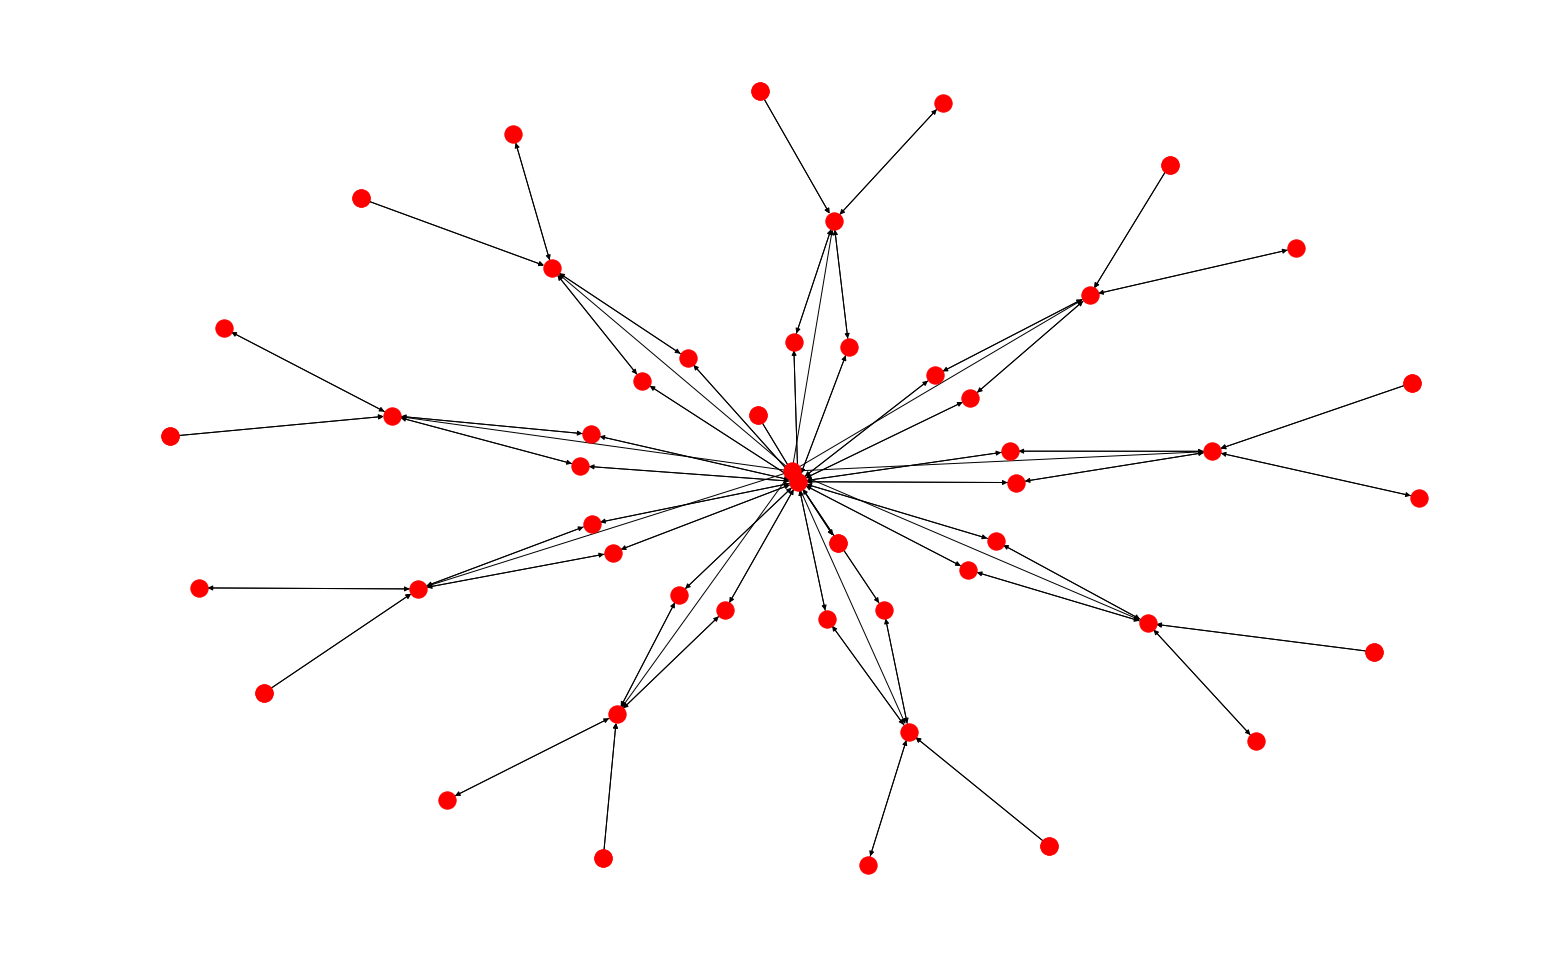

In [71]:
market = Market(a1, a2, a3, a4, a5, a6, a7, a8, a9, a0)
path = 'test/market.dot'
market.dot(path)
G = networkx.nx_pydot.read_dot(path)
networkx.draw_kamada_kawai(G)

Select where to start the simulation and the number of consequative hours for model predictive control. The graph depicts the relevant time window.

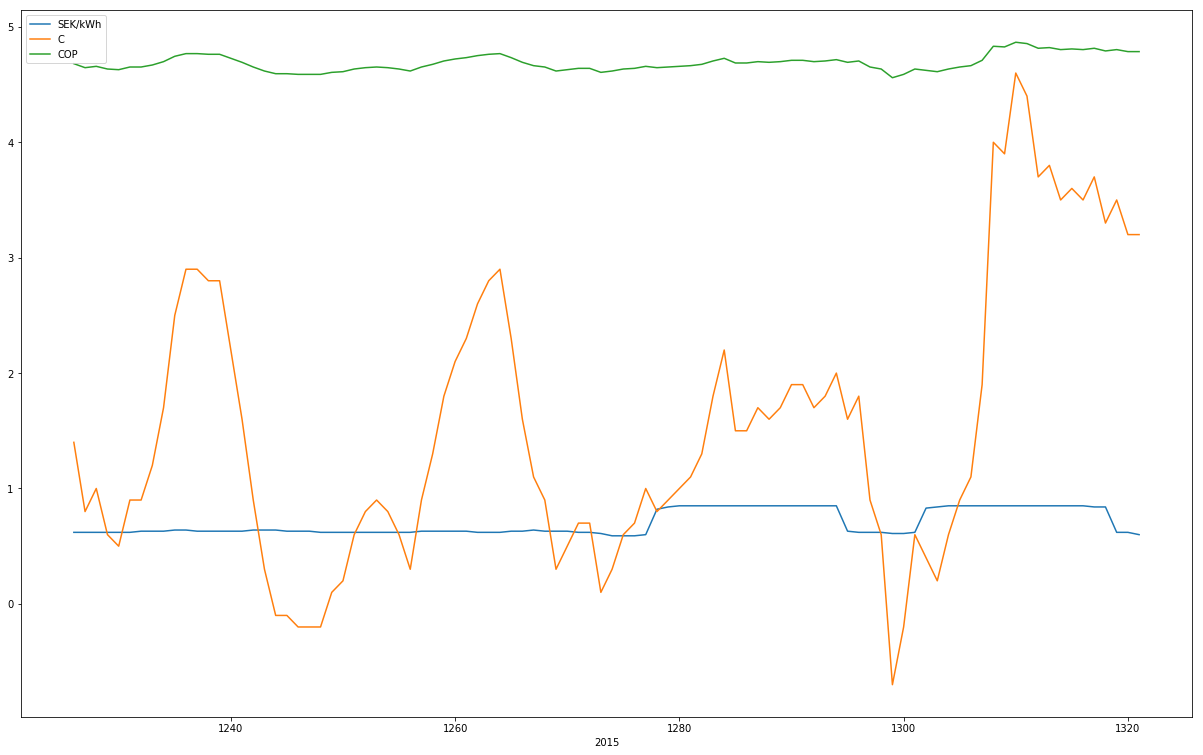

In [81]:
run_start = 1249 # Ferbruary 22
run_periods = 24
df[['SEK/kWh', 'C', 'COP']][
    run_start - periods :
    run_start + 2 * periods + run_periods
].plot()

Run the simulation, and plot how the residuals develop over time. Note that, sometimes, the optimization failes for no good reason. When that happens, re-instantiate the market to keep things manageable.

0.47643303871154785
0.36951708793640137
0.5724091529846191
0.8343460559844971
0.4827151298522949
0.448408842086792
0.3962709903717041
0.41631269454956055
0.4457540512084961
0.41068172454833984
0.39630699157714844
0.38885974884033203
0.410200834274292
0.39555811882019043
0.37967586517333984
0.37997007369995117
0.4507930278778076
0.3930058479309082
0.37705230712890625
0.37760400772094727
0.38853979110717773
0.3742818832397461
0.3770768642425537
0.3804922103881836


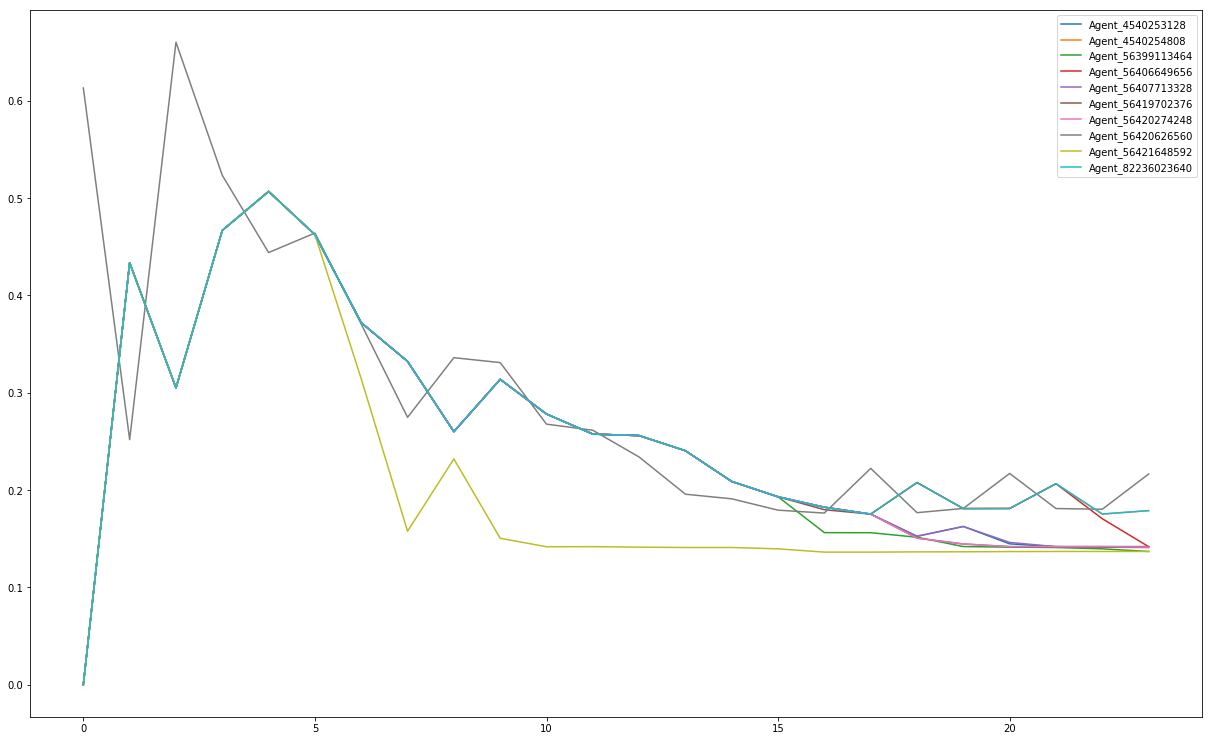

In [73]:
for period in range(run_periods):
    s = time.time()
    market.run(df, run_start + period, 100)
    e = time.time()
    print(e - s)
pandas.DataFrame(market.log).plot()

For sufficiently nice cost functions, higher prices should correlate with positive temperature offsets, and sometimes with agents utilizing negative temperature offsets to heat buildings during periods with lower prices to avoid having to heat them as much during periods with higer prices.

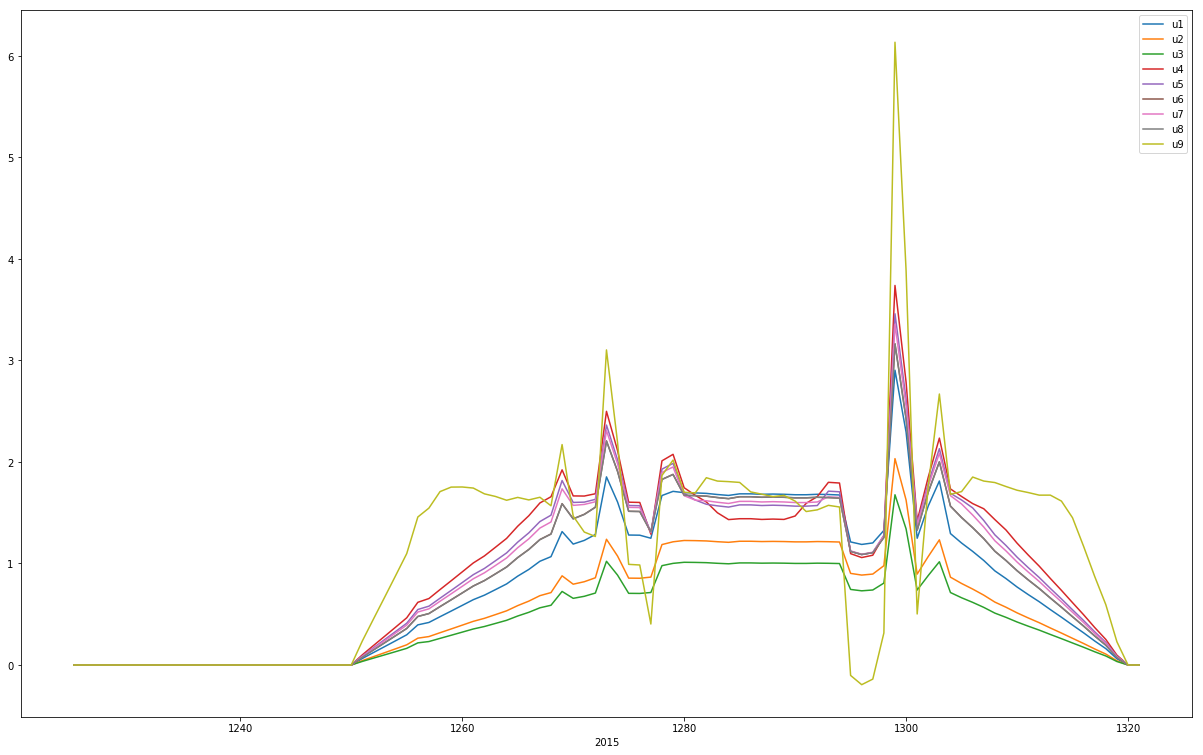

In [74]:
df[['u%r' % i for i in range(1, 10)]].loc[
    run_start - periods :
    run_start + 2 * periods + run_periods
].plot()

Finally, the electrical energy consumed by the central heat pump.

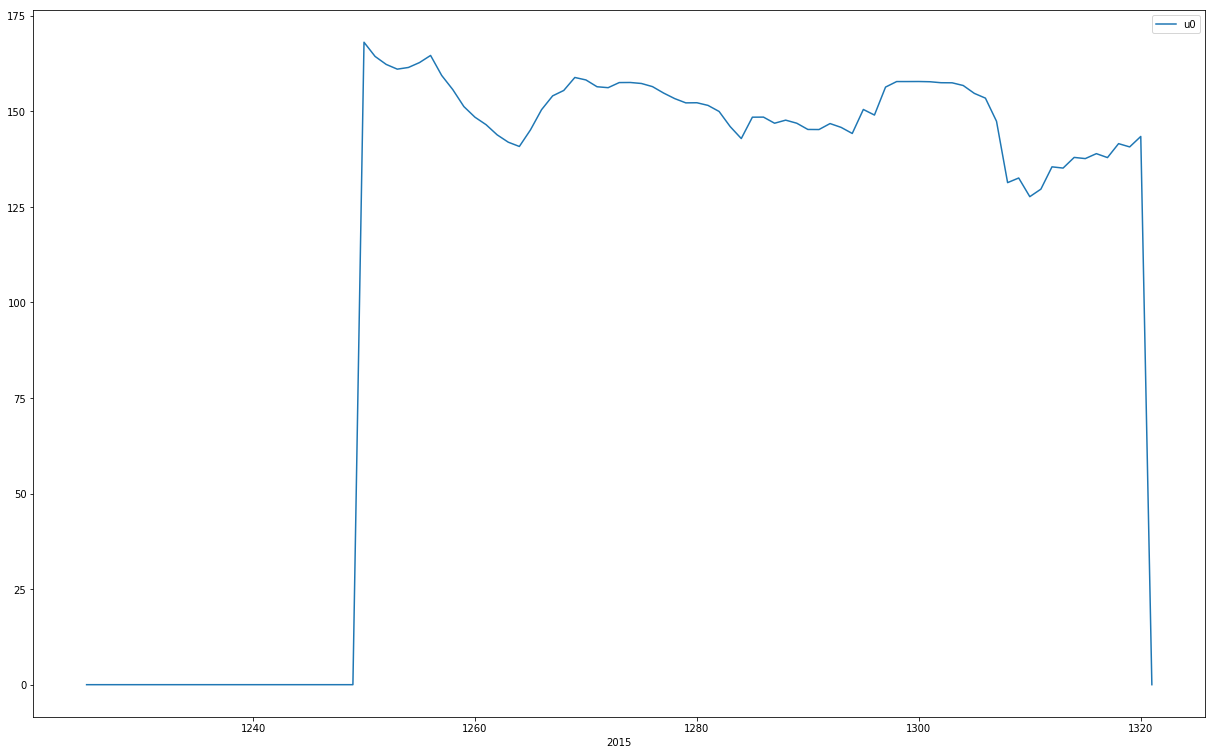

In [75]:
df[['u0']].loc[
    run_start - periods :
    run_start + 2 * periods + run_periods
].plot()